In [1]:
#SPG 01
from bs4 import BeautifulSoup
import requests

url = "https://www.erdetfredag.dk"

result = requests.get(url)
soup = BeautifulSoup(result.text, 'html.parser')
tag = soup.h2
att = tag['class']
print(att)








['no']


In [2]:
#SPG 02







In [3]:
#SPG 03
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import math

options = Options()
options.headless = True
driver = webdriver.Firefox(options=options)

def price_of_groceries():
    
    groceries = ['gær', 'minimælk', 'banan', 'tomatpasta']
    
    total = []

    
    url = 'https://www.nemlig.com/'

   
    # åbner url og maximere vinduet så den henter det rigtige data ud. hvis siden bliver scalet kan der ske ting som burger menu der gør vi får andet input ud.
    driver.get(url)
    driver.maximize_window()

    # acceptere cookies på hjemmesiden
    driver.implicitly_wait(10)
    driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/div[2]/div[1]/button[3]').click()

    
    for grocerie in groceries:

        # finder form og skriver input ind
        elem = driver.find_element_by_id('site-header-search-field-main')
        elem.click()
        elem.send_keys(grocerie)
        elem.submit()

        
        heltal = driver.find_elements_by_xpath(
            '/html/body/searchoverlay/div/div/div/searchresult/div[1]/div[3]/div[1]/div[1]/div[1]/productlist-item[1]/a/div/div[3]/pricecontainer/div/div[2]/span')
        kommatal = driver.find_elements_by_xpath(
            '/html/body/searchoverlay/div/div/div/searchresult/div[1]/div[3]/div[1]/div[1]/div[1]/productlist-item[1]/a/div/div[3]/pricecontainer/div/div[2]/sup')

        
        for elem in heltal:
            val1 = elem.text

        
        for elem in kommatal:
            val2 = elem.text

        # da begge tal på pris starter som string skal disse laves om til float
        sum = float(str(val1) + '.' + str(val2))

        # clear formen
        driver.find_element_by_xpath('//*[@id="site-header-search-field-main"]').clear()

        # printer hver grocerie og printer prisen
        print(grocerie, 'koster', sum)
        total.append(sum)

    # tager alle priser og ligger dem sammen.
    print('Total: ', math.fsum(total))

price_of_groceries()

gær koster 1.25
minimælk koster 12.5
banan koster 11.25
tomatpasta koster 2.5
Total:  27.5


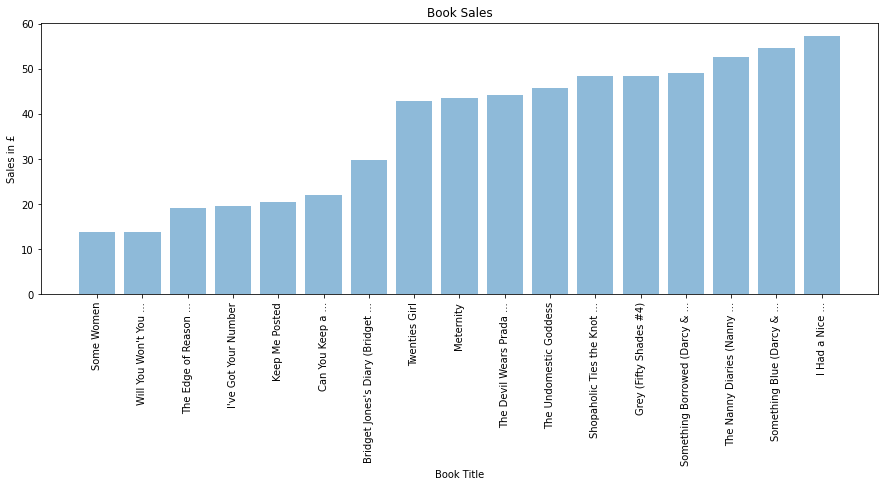

In [4]:
import selenium
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plot
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = Options()
options.headless = True
driver = webdriver.Firefox(options=options)

url = 'http://books.toscrape.com/index.html'


# åbner url og maximere vinduet så den henter det rigtige data ud. hvis siden bliver scalet kan der ske ting som burger menu der gør vi får andet input ud.
driver.get(url)
driver.maximize_window()

# finder og klikker på "Womens Fiction" og laver en soup function
driver.find_element_by_xpath('//*[@id="default"]/div/div/div/aside/div[2]/ul/li/ul/li[8]/a').click()
new_url = driver.current_url
req = requests.get(new_url)
soup = BeautifulSoup(req.content, 'html.parser')


titles = []
prices = []

# Føjer alle titler til arrayet titles
for x in soup.findAll('h3'):
    titles.append(x.text)
    
# Føjer alle priser til arrayet prices og konvatere det om til float og fjerner £. 
for x in soup.findAll('p', {'class': 'price_color'}):
    prices.append(float(x.text.replace('£', '')))

# Laver et dictonary af begge arrays 
data = dict(zip(titles, prices))

# sortere dictonary via deres value fra lavest til højest
sorted_dict = dict(sorted(data.items(), key=lambda item:item[1]))

# laver barchartet
plot.rcParams["figure.figsize"] = (15, 5)
plot.bar(sorted_dict.keys(), sorted_dict.values(), align='center', alpha=0.5)
plot.ylabel('Sales in £')
plot.xlabel('Book Title')
plot.xticks(rotation=90)
plot.title('Book Sales')

plot.show()